In [1]:
import os

import cv2
import numpy as np

import metaimage
import display

%load_ext autoreload
%autoreload 2

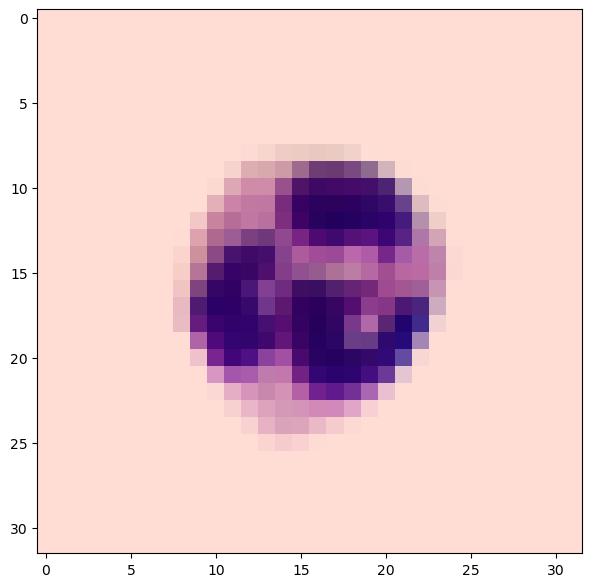

In [3]:
image_folder = "images/Original/Neutrophil/"
mask_folder = "images/Ground Truth/Neutrophil/"

files = os.listdir(image_folder)

image = cv2.imread(
        os.path.join(image_folder, files[10]), cv2.IMREAD_COLOR
    )[..., ::-1]

mask = cv2.imread(
        os.path.join(mask_folder, files[10]), cv2.IMREAD_GRAYSCALE
    )

height = int(image.shape[0] * 0.7)
width = int(image.shape[1] * 0.7)

top = (image.shape[0] - height) // 2
left = (image.shape[1] - width) // 2

image = image[top:top + height, left:left + width, :]
mask = mask[top:top + height, left:left + width]

isolated = np.zeros_like(image)

isolated[..., :] = np.median(image[mask<=32],axis=0)

isolated[mask > 32] = image[mask > 32]

output_img = cv2.resize(isolated, (32, 32), interpolation=cv2.INTER_AREA)

display.grid([metaimage.ColourImage(output_img),], figsize=(6, 6))
display.show()

In [4]:
raw_mask_folder = "images/Ground Truth/Neutrophil"
raw_image_folder = "images/Original/Neutrophil"

files = os.listdir(raw_mask_folder)

mask_files = os.listdir(raw_mask_folder)

def extract_image(image_folder: str, mask_folder: str, image_name: str, image_side_length: int, crop: float = 0) -> np.ndarray:
    image = cv2.imread(
            os.path.join(image_folder, image_name), cv2.IMREAD_COLOR
        )[..., ::-1]

    mask = cv2.imread(
            os.path.join(mask_folder, image_name), cv2.IMREAD_GRAYSCALE
        )

    if crop > 0:
        height = int(image.shape[0] * (1-crop))
        width = int(image.shape[1] * (1-crop))

        top = (image.shape[0] - height) // 2
        left = (image.shape[1] - width) // 2

        image = image[top:top + height, left:left + width, :]
        mask = mask[top:top + height, left:left + width]

    isolated = np.zeros_like(image)

    isolated[..., :] = np.quantile(image[mask<=32],0.75,axis=0)

    isolated[mask > 32] = image[mask > 32]

    output_img = cv2.resize(isolated, (image_side_length, image_side_length), interpolation=cv2.INTER_AREA)
    
    return output_img

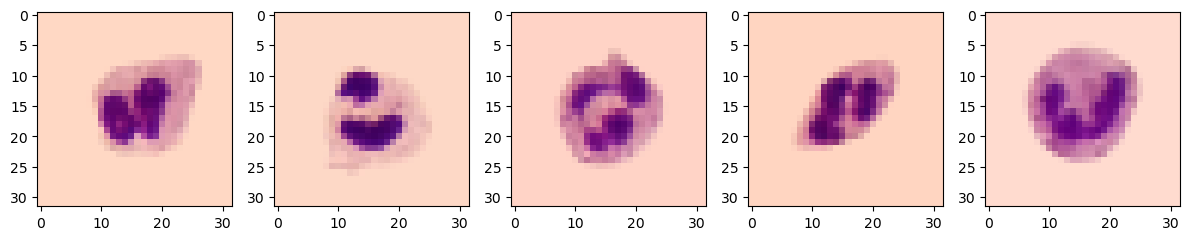

In [6]:
isolated_imgs = [extract_image(
    raw_image_folder,
    raw_mask_folder,
    img,
    32,
    0.2
) for img in files]

img_nos = np.random.randint(0, len(isolated_imgs), size=5)

display.grid([[metaimage.ColourImage(isolated_imgs[i]) for i in img_nos]])
display.show()

In [89]:
save_folder = "images/IsolatedNeutro"

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

for i, img in enumerate(isolated_imgs):
    cv2.imwrite(os.path.join(save_folder, str(i) + ".png"), img)
    